In [1]:
%autosave 0

Autosave disabled


# Give instructions for making your favorite pizza! 

In [48]:
# instructions = u'''Pizza making instructions
# Buy the dough and knead the dough.
# Put tomato sauce on the dough.
# Spread some cheese. Put toppings of mushrooms, paprika and olives.
# Put it in the oven at 200 degrees for 20 minutes.
# Take it out and deliver at Turing room.
# '''

instructions = u'''make breakfast the night before with a hash brown casserole
Start by mixing together your cream of mushroom condensed soup sour cream salt pepper onion and cheese in a large bowl
After these are well combined add in the hash browns and mix gently
Spray your slow cooker with some non-stick cooking spray or coat with butter
This will prevent sticking so you don't have a huge mess to clean up
Pour the hash brown mixture into your slow cooker and put the cover on
Turn the slow cooker on high and leave for 1 to 1.5 hours
After this turn the heat to low and leave it on for 2.5 hours longer
Turn off slow cooker and serve right away
Keep on warm if you plan on waiting to enjoy for a little bit longer
It's best when served with scrambled eggs
If you want to add something unique to this recipe add your favorite vegetables
It's generally best to use soft vegetables or those that have been slightly cooked before you add them
This will ensure they don't turn out hard when the rest of the dish is cooked fully
Broccoli and cheese work well together but peppers also taste great
You can also add in cooked sausage or bacon if you want some meat in the dish
Just make sure that the meat you add is already cooked before it's put in
If you add in raw meat it likely won't fully cook when the rest of the dish is done and may be raw
This is a very forgiving recipe that you can play around with and change if you want to add or omit something
You can do everything from adding in some garlic to switching the flavor of condensed soup you use'''

In [49]:
fname = 'cooking_1.txt'
main_file_name = 'non_gui2.py'

In [50]:
# replace input filename in the main file
import re

# Read in the file
with open(main_file_name, 'r') as file :
  filedata = file.read()

# Replace the target string
filedata = re.sub(r'input_filename = .*txt', "input_filename = '"+ fname, filedata)

# Write the file out again
with open(main_file_name, 'w') as file:
  file.write(filedata)

In [51]:
# Writing the instructions file into directory
# Writing the file
text_file = open("./data/final_test/cooking_1.txt", "w")
text_file.write(instructions)
text_file.close()

# Reading the file
text_file = open("./data/final_test/cooking_1.txt", "r")
print(text_file.read())
text_file.close()


make breakfast the night before with a hash brown casserole
Start by mixing together your cream of mushroom condensed soup sour cream salt pepper onion and cheese in a large bowl
After these are well combined add in the hash browns and mix gently
Spray your slow cooker with some non-stick cooking spray or coat with butter
This will prevent sticking so you don't have a huge mess to clean up
Pour the hash brown mixture into your slow cooker and put the cover on
Turn the slow cooker on high and leave for 1 to 1.5 hours
After this turn the heat to low and leave it on for 2.5 hours longer
Turn off slow cooker and serve right away
Keep on warm if you plan on waiting to enjoy for a little bit longer
It's best when served with scrambled eggs
If you want to add something unique to this recipe add your favorite vegetables
It's generally best to use soft vegetables or those that have been slightly cooked before you add them
This will ensure they don't turn out hard when the rest of the dish is co

# Extract action sequence

In [52]:
!python3.6 non_gui2.py

/Users/shivam/Library/Python/3.6/lib/python/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shivam/Library/Python/3.6/lib/python/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shivam/Library/Python/3.6/lib/python/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shivam/Library/Python/3.6/lib/python/site-packages/ten

Loaded weights from weights/cooking_act_bert.h5 ...
Loaded weights from weights/cooking_arg_elmo.h5 ...
weights loaded ...
make breakfast the night before with a hash brown casserole
Start by mixing together your cream of mushroom condensed soup sour cream salt pepper onion and cheese in a large bowl
After these are well combined add in the hash browns and mix gently
Spray your slow cooker with some non-stick cooking spray or coat with butter
This will prevent sticking so you don't have a huge mess to clean up
Pour the hash brown mixture into your slow cooker and put the cover on
Turn the slow cooker on high and leave for 1 to 1.5 hours
After this turn the heat to low and leave it on for 2.5 hours longer
Turn off slow cooker and serve right away
Keep on warm if you plan on waiting to enjoy for a little bit longer
It's best when served with scrambled eggs
If you want to add something unique to this recipe add your favorite vegetables
It's generally best to use soft vegetables or those t

# Learn the domain model in PDDL using LOCM2

In [43]:
from collections import defaultdict
import itertools
import os
from tabulate import tabulate
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import pandas as pd
pd.options.display.max_columns = 100

## interactive-LOCM 
This code combines LOCM1 and LOCM2 algorithms and is last part of the pipeline that I use in my thesis to generate PDDL models from instructional texts.

- Step 1: Find classes and make transition graphs.
- Step 2: Get transistion sets from LOCM2 algorithm
- Step 3: Create FSMs
- Step 4: Perform Zero Analysis and add new FSM if necessary.
- Step 5: Create and test hypothesis for state parameters
- Step 6: Create and merge state parameters
- Step 7: Remove parameter flaws
- Step 8: Extract static preconditions
- Step 9: Form action schemas

In [53]:
input_file_name = "locm_data/"+fname
domain_name = input_file_name.split('/')[-1].split('.')[0] #domain name is the name of the file

In [54]:
print(domain_name)

cooking_1


### Read input file

In [55]:
def read_file(file_path):
    '''
    Read the input data and return list of action sequences.
    Each sequence is a list of action-argumentlist tuples.
    '''
    file = open(input_file_name, 'r')
    sequences = []
    for line in file:
        
        actions = []
        arguments = []
        if line and not line.isspace() and len(line)>1:
            sequence = line.rstrip("\n\r").lstrip("\n\r").lower() 
            action_defs = sequence.split("),")

            for action_def in action_defs:
                action = action_def.split('(')[0].strip(")\n\r").strip()
                argument = action_def.split('(')[1].strip(")\n\r")
                actions.append(action.strip())
                argument_list = argument.split(',')
                argument_list = [x.strip() for x in argument_list]
                #argument_list.insert(0,'zero')
                arguments.append(argument_list)
                
            
            actarg_tuples = zip(actions,arguments)
            sequences.append(list(actarg_tuples))
    return sequences

def print_sequences(sequences):
    for seq in sequences:
        for action in seq:
            print(action)
        print()

        
sequences = read_file(input_file_name)


In [56]:
print_sequences(sequences)
print(len(sequences))

('mixing', ['cream', 'mushroom', 'soup', 'cream', 'salt', 'pepper', 'onion', 'cheese'])
('combined', [''])
('add', ['browns'])
('mix', [''])
('spray', ['cooker'])
('pour', ['hash', 'mixture'])
('put', ['cover'])
('turn', ['cooker'])
('leave', ['cooker'])
('turn', ['heat'])
('leave', ['heat', 'it'])
('turn', ['cooker'])
('serve', [''])
('keep', [''])
('enjoy', [''])
('served', ['eggs'])
('add', ['something'])
('add', ['vegetables'])
('use', ['vegetables'])
('add', [''])
('cooked', ['dish'])
('add', ['sausage', 'bacon', 'meat'])
('put', [''])
('add', ['meat'])
('play', ['recipe'])
('change', [''])
('add', ['something'])
('do', ['everything'])
('adding', ['garlic'])
('switching', ['flavor'])

1


### Step 1.1: Find classes 

In [57]:
transitions = set() # A transition is denoted by action_name + argument_number.
arguments = set()
actions = set()
for seq in sequences:
    for actarg_tuple in seq:
        actions.add(actarg_tuple[0])
        for j, arg in enumerate(actarg_tuple[1]):
            transitions.add(actarg_tuple[0]+"."+str(j))
            arguments.add(arg)

print("\nActions")
print(actions)
print("\nTransitions")
print(transitions)
print("\nArguments/Objects")
print(arguments)


Actions
{'cooked', 'enjoy', 'mixing', 'use', 'put', 'add', 'combined', 'change', 'served', 'spray', 'serve', 'do', 'adding', 'pour', 'turn', 'keep', 'play', 'leave', 'switching', 'mix'}

Transitions
{'mixing.1', 'change.0', 'leave.0', 'do.0', 'enjoy.0', 'mix.0', 'keep.0', 'put.0', 'adding.0', 'turn.0', 'mixing.7', 'served.0', 'leave.1', 'mixing.4', 'use.0', 'spray.0', 'add.1', 'mixing.5', 'switching.0', 'combined.0', 'mixing.3', 'mixing.2', 'serve.0', 'pour.1', 'play.0', 'mixing.6', 'add.0', 'cooked.0', 'add.2', 'mixing.0', 'pour.0'}

Arguments/Objects
{'cheese', '', 'cover', 'pepper', 'it', 'heat', 'salt', 'dish', 'bacon', 'meat', 'everything', 'soup', 'flavor', 'onion', 'browns', 'something', 'eggs', 'recipe', 'garlic', 'cream', 'sausage', 'cooker', 'hash', 'mixture', 'vegetables', 'mushroom'}


In [58]:
def get_actarg_dictionary(sequences):
    d = defaultdict(list)
    for seq in sequences:
        for actarg_tuple in seq:
            d[actarg_tuple[0]].append(actarg_tuple[1])
    return d
d = get_actarg_dictionary(sequences)

In [59]:
# class util functions.
def get_classes(d):
    # TODO incorporate word similarity in get classes.
    c = defaultdict(set)
    for k,v in d.items():
        for arg_list in v:
            for i,object in enumerate(arg_list):
                c[k,i].add(object)

    sets = c.values()
    classes = []
    # remove duplicate classes
    for s in sets:
        if s not in classes:
            classes.append(s)

    # now do pairwise intersections of all values. If intersection, combine them; then return the final sets.
    classes_copy = list(classes)
    while True:
        combinations = list(itertools.combinations(classes_copy,2))
        intersections_count = 0
        for combination in combinations:
            if combination[0].intersection(combination[1]):
                intersections_count +=1

                if combination[0] in classes_copy:
                    classes_copy.remove(combination[0])
                if combination[1] in classes_copy:
                    classes_copy.remove(combination[1])
                classes_copy.append(combination[0].union(combination[1]))

        if intersections_count==0:
            # print("no intersections left")
            break

    return classes_copy

# TODO: Can use better approach here. NER will help.
def get_class_names(classes):
    # Name the class to first object found ignoring the digits in it
    class_names = []
    for c in classes:
        for object in c:
#             object = ''.join([i for i in object if not i.isdigit()])
            class_names.append(object)
            break
    return class_names

def get_class_index(arg,classes):
    for class_index, c in enumerate(classes):
        if arg in c:
            return class_index #it is like breaking out of the loop
    print("Error:class index not found") #this statement is only executed if class index is not returned.

In [60]:
classes = get_classes(d) #sorts of object
print("\nSorts/Classes")
print(classes)

class_names = get_class_names(classes)
print("\nExtracted class names")
print(class_names)


Sorts/Classes
[{'cream'}, {'mushroom'}, {'soup'}, {'salt'}, {'pepper'}, {'onion'}, {'cheese'}, {'bacon'}, {'hash'}, {'mixture'}, {'it'}, {'eggs'}, {'dish'}, {'recipe'}, {'everything'}, {'garlic'}, {'flavor'}, {'heat', 'cooker'}, {'', 'cover', 'browns', 'something', 'vegetables', 'meat', 'sausage'}]

Extracted class names
['cream', 'mushroom', 'soup', 'salt', 'pepper', 'onion', 'cheese', 'bacon', 'hash', 'mixture', 'it', 'eggs', 'dish', 'recipe', 'everything', 'garlic', 'flavor', 'heat', '']


''

# USER INPUT 1: ENTER CORRECT CLASS NAMES

In [66]:
############ (Optional) User Input ############
# Give user an option to change class names.
# class_names[0] = 'rocket'
# class_names[1] = 'hands'
class_names[len(class_names)-1] = 'unknown'

print("\nRenamed class names")
print(class_names)



Renamed class names
['cream', 'mushroom', 'soup', 'salt', 'pepper', 'onion', 'cheese', 'bacon', 'hash', 'mixture', 'it', 'eggs', 'dish', 'recipe', 'everything', 'garlic', 'flavor', 'heat', 'unknown']


#### Assumptions
- Each object of a same class undergoes similar kind of transition.
- Objects of same class in a same action undergo similar kind of transition.

In [67]:
# change transitions to be more meaningful by incorporating class_names.
full_transitions = set()
for seq in sequences:
    for actarg_tuple in seq:
        actions.add(actarg_tuple[0])
        for j, arg in enumerate(actarg_tuple[1]):
            full_transitions.add(actarg_tuple[0]+"."+class_names[get_class_index(arg,classes)]+"."+str(j))
            arguments.add(arg)

print("\nActions")
print(actions)
print("\nTransitions")
print(transitions)
print(full_transitions)
print("\nArguments/Objects")
print(arguments)


Actions
{'cooked', 'enjoy', 'mixing', 'use', 'put', 'add', 'combined', 'change', 'served', 'spray', 'serve', 'do', 'adding', 'pour', 'turn', 'keep', 'play', 'leave', 'switching', 'mix'}

Transitions
{'mixing.1', 'change.0', 'leave.0', 'do.0', 'enjoy.0', 'mix.0', 'keep.0', 'put.0', 'adding.0', 'turn.0', 'mixing.7', 'served.0', 'leave.1', 'mixing.4', 'use.0', 'spray.0', 'add.1', 'mixing.5', 'switching.0', 'combined.0', 'mixing.3', 'mixing.2', 'serve.0', 'pour.1', 'play.0', 'mixing.6', 'add.0', 'cooked.0', 'add.2', 'mixing.0', 'pour.0'}
{'serve.unknown.0', 'mixing.cream.3', 'mixing.cream.0', 'mixing.pepper.5', 'turn.heat.0', 'keep.unknown.0', 'switching.flavor.0', 'add.unknown.0', 'mixing.cheese.7', 'adding.garlic.0', 'mixing.soup.2', 'enjoy.unknown.0', 'add.unknown.2', 'combined.unknown.0', 'change.unknown.0', 'add.bacon.1', 'do.everything.0', 'mixing.salt.4', 'leave.it.1', 'leave.heat.0', 'pour.mixture.1', 'served.eggs.0', 'mixing.onion.6', 'use.unknown.0', 'play.recipe.0', 'pour.hash.

In [68]:
print("\nNumber of Actions: {},\nNumber of unique transitions: {},\nNumber of unique objects (arguments): {},\nNumber of classes/sorts: {}".format(len(actions), len(transitions), len(arguments), len(classes)))


Number of Actions: 20,
Number of unique transitions: 31,
Number of unique objects (arguments): 26,
Number of classes/sorts: 19


### Step 1.2: Make transition graphs

User can fix these easily as well. (Cytoscape).

Building Transition graph util

In [69]:
def build_and_save_transition_graphs(classes, domain_name, class_names):
    # There should be a graph for each class of objects.
    graphs = []  # number of graphs = number of sorts.
    # Initialize all graphs empty
    for sort in classes:
        graphs.append(nx.DiGraph())

    consecutive_transition_lists = [] #list of consecutive transitions per object instance per sequence.

    for m, arg in enumerate(arguments):  # for all arguments (objects found in sequences)
        for n, seq in enumerate(sequences):  # for all sequences
            consecutive_transition_list = list()  # consecutive transition list for a sequence and an object (arg)
            for i, actarg_tuple in enumerate(seq):
                for j, arg_prime in enumerate(actarg_tuple[1]):  # for all arguments in actarg tuples
                    if arg == arg_prime:  # if argument matches arg
                        node = actarg_tuple[0] + "." +  str(j)
#                         node = actarg_tuple[0] +  "." + class_names[get_class_index(arg,classes)] + "." +  str(j)  # name the node of graph which represents a transition
                        consecutive_transition_list.append(node)  # add node to the cons_transition for sequence and argument

                        # for each class append the nodes to the graph of that class
                        class_index = get_class_index(arg_prime, classes)  # get index of class to which the object belongs to
                        graphs[class_index].add_node(node)  # add node to the graph of that class

            consecutive_transition_lists.append([n, arg, consecutive_transition_list])

    # print(consecutive_transition_lists)
    # for all consecutive transitions add edges to the appropriate graphs.
    for cons_trans_list in consecutive_transition_lists:
        # print(cons_trans_list)
        seq_no = cons_trans_list[0]  # get sequence number
        arg = cons_trans_list[1]  # get argument
        class_index = get_class_index(arg, classes)  # get index of class
        # add directed edges to graph of that class
        for i in range(0, len(cons_trans_list[2]) - 1):
                if graphs[class_index].has_edge(cons_trans_list[2][i], cons_trans_list[2][i + 1]):
                    graphs[class_index][cons_trans_list[2][i]][cons_trans_list[2][i + 1]]['weight'] += 1
                else:
                    graphs[class_index].add_edge(cons_trans_list[2][i], cons_trans_list[2][i + 1], weight=1)


    
    # make directory if doesn't exist
    dirName = "output/"+ domain_name
    if not os.path.exists(dirName):
        os.makedirs(dirName)
        print("Directory ", dirName, " Created ")
    else:
        print("Directory ", dirName, " already exists")
    empty_directory(dirName)


    # plot and save all the graphs
    adjacency_matrix_list = plot_and_save(graphs) # list of adjacency matrices per class

    return adjacency_matrix_list

def plot_and_save(graphs):
    adjacency_matrix_list = [] # list of adjacency matrices per class
    
    for index, G in enumerate(graphs):
        # TODO: Can use cytoscape or gephi for changes in Transition graphs (due to errors in data extracted).
        nx.write_graphml(G, "output/"+ domain_name + "/" +  class_names[index] + ".graphml")

        nx.draw(G, arrow_style='fancy', with_labels=True)
        labels = nx.get_edge_attributes(G, 'weight')
        pos = nx.spring_layout(G)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.show()
        print("Nodes:{}".format(G.nodes()))
        print("Edges:{}".format(G.edges()))

        # TODO: save dataframes in cache and reload them.
        # A = nx.to_numpy_matrix(G, nodelist=G.nodes())
        
        df = nx.to_pandas_adjacency(G, nodelist=G.nodes(), dtype=int)
        adjacency_matrix_list.append(df)
    return adjacency_matrix_list

##### Utils

In [70]:
def empty_directory(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            # elif os.path.isdir(file_path): shutil.rmtree(file_path)
        except Exception as e:
            print(e)

def findsubsets(S,m):
    return set(itertools.combinations(S, m))

def print_table(matrix):
    print(tabulate(matrix, headers='keys', tablefmt='github'))

##### Transition Graphs

Directory  output/cooking_1  Created 


/Users/shivam/Library/Python/3.6/lib/python/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/shivam/Library/Python/3.6/lib/python/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


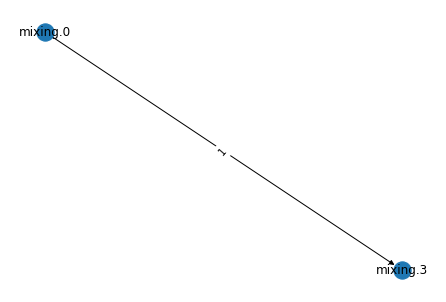

Nodes:['mixing.0', 'mixing.3']
Edges:[('mixing.0', 'mixing.3')]


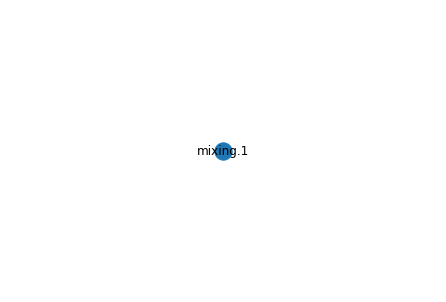

Nodes:['mixing.1']
Edges:[]


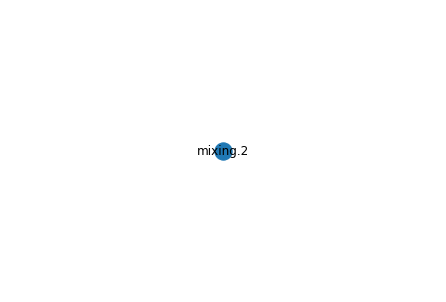

Nodes:['mixing.2']
Edges:[]


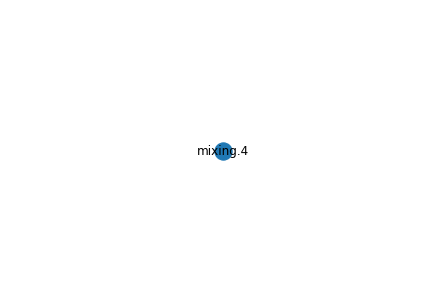

Nodes:['mixing.4']
Edges:[]


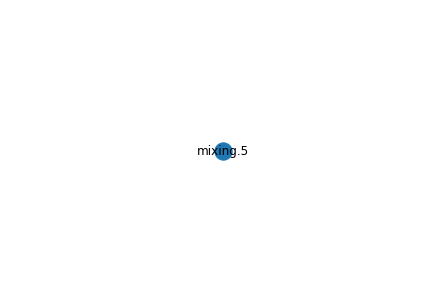

Nodes:['mixing.5']
Edges:[]


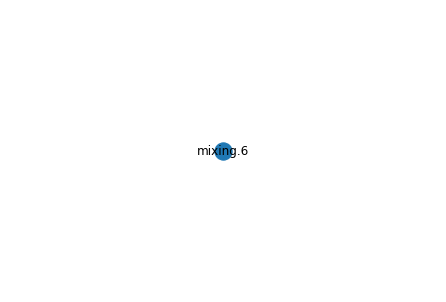

Nodes:['mixing.6']
Edges:[]


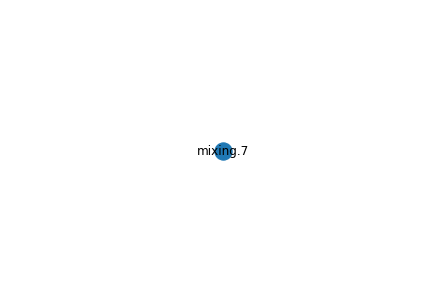

Nodes:['mixing.7']
Edges:[]


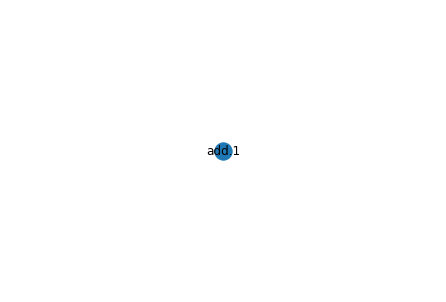

Nodes:['add.1']
Edges:[]


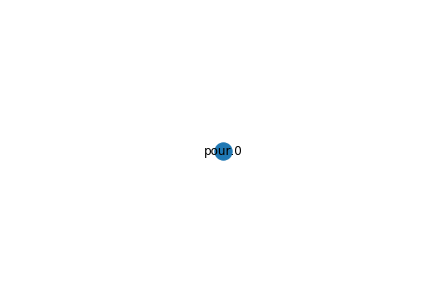

Nodes:['pour.0']
Edges:[]


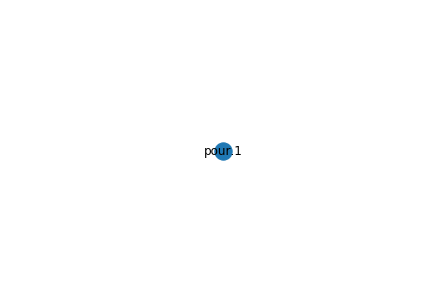

Nodes:['pour.1']
Edges:[]


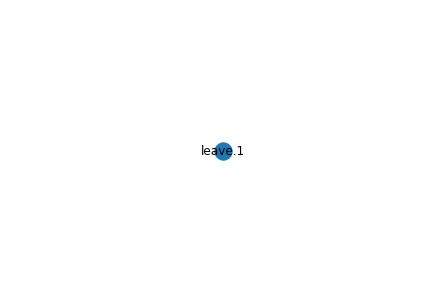

Nodes:['leave.1']
Edges:[]


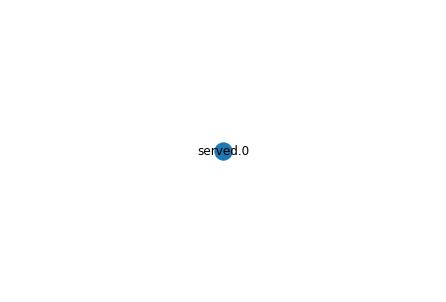

Nodes:['served.0']
Edges:[]


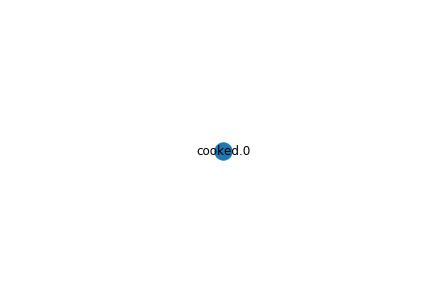

Nodes:['cooked.0']
Edges:[]


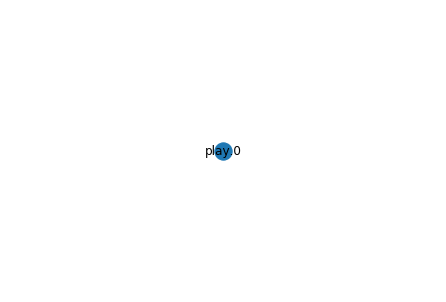

Nodes:['play.0']
Edges:[]


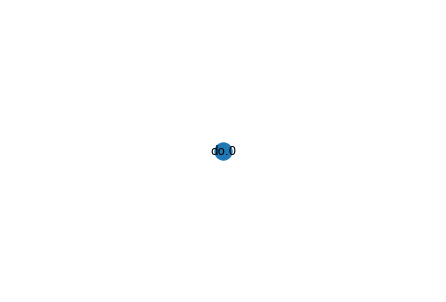

Nodes:['do.0']
Edges:[]


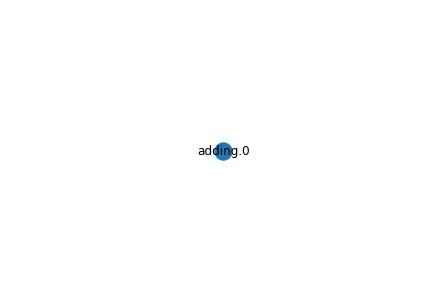

Nodes:['adding.0']
Edges:[]


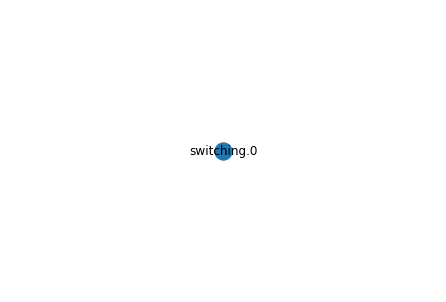

Nodes:['switching.0']
Edges:[]


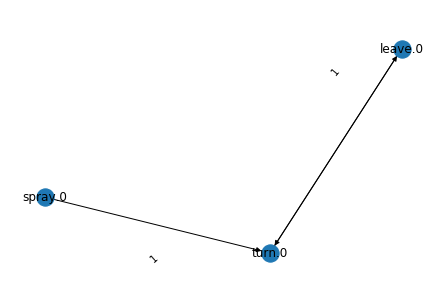

Nodes:['turn.0', 'leave.0', 'spray.0']
Edges:[('turn.0', 'leave.0'), ('leave.0', 'turn.0'), ('spray.0', 'turn.0')]


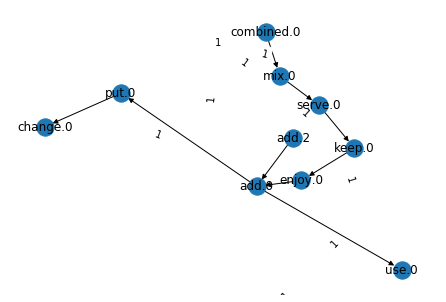

Nodes:['combined.0', 'mix.0', 'serve.0', 'keep.0', 'enjoy.0', 'add.0', 'put.0', 'change.0', 'add.2', 'use.0']
Edges:[('combined.0', 'mix.0'), ('mix.0', 'serve.0'), ('serve.0', 'keep.0'), ('keep.0', 'enjoy.0'), ('enjoy.0', 'add.0'), ('add.0', 'put.0'), ('add.0', 'add.0'), ('add.0', 'use.0'), ('put.0', 'change.0'), ('add.2', 'add.0')]


In [71]:
#### Build weighted directed graphs for transitions.
adjacency_matrix_list = build_and_save_transition_graphs(classes, domain_name, class_names)

### Step 2: Get Transition Sets from LOCM2

Algorithm: LOCM2
Input : 
- T_all = set of observed transitions for a sort/class
- H : Set of holes - each hole is a set of two transitions.
- P : Set of pairs <t1,t2> i.e. consecutive transitions.
- E : Set of example sequences of actions.
Output:
- S : Set of transition sets.
#### Finding holes

In [72]:
def get_adjacency_matrix_with_holes(adjacency_matrix_list):
    adjacency_matrix_list_with_holes = []
    for index,adjacency_matrix in enumerate(adjacency_matrix_list):
        # print("\n ROWS ===========")
        df = adjacency_matrix.copy()
        df1 = adjacency_matrix.copy()

        # for particular adjacency matrix's copy, loop over all pairs of rows
        for i in range(df.shape[0] - 1):
            for j in range(i+1, df.shape[0]):
                idx1, idx2 = i, j
                row1, row2 = df.iloc[idx1,:], df.iloc[idx2, :] #we have now all pairs of rows

                common_values_flag = False #for each two rows we have a common_values_flag

                # if there is a common value between two rows, turn common value flag to true
                for col in range(row1.shape[0]):
                    if row1.iloc[col] > 0 and row2.iloc[col] > 0:
                        common_values_flag = True
                        break

                # now if two rows have common values, we need to check for holes.
                if common_values_flag:
                    for col in range(row1.shape[0]):
                        if row1.iloc[col] > 0 and row2.iloc[col] == 0:
                            df1.iloc[idx2,col] = 'hole'
                        elif row1.iloc[col] == 0 and row2.iloc[col] > 0:
                            df1.iloc[idx1, col] = 'hole'

        adjacency_matrix_list_with_holes.append(df1)
    return adjacency_matrix_list_with_holes

In [73]:
adjacency_matrix_list_with_holes = get_adjacency_matrix_with_holes(adjacency_matrix_list)

### Printing FSM matrices with and without holes
#for index,adjacency_matrix in enumerate(adjacency_matrix_list):
    #print("\n==========" + class_names[index] + "==========")
    # print(adjacency_matrix)
    #print(tabulate(adjacency_matrix, headers='keys', tablefmt='github'))

    #print("\n===== HOLES: " + class_names[index] + "==========")
    #print(tabulate(adjacency_matrix_list_with_holes[index], headers='keys', tablefmt='github'))


In [74]:
# Create list of set of holes per class (H)
holes_per_class = []

for index,df in enumerate(adjacency_matrix_list_with_holes):
    holes = set()
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            if df.iloc[i,j] == 'hole':
                holes.add(frozenset({df.index[i] , df.columns[j]}))
    holes_per_class.append(holes)
# for i, hole in enumerate(holes_per_class):
#     print(class_names[i]+":")
#     for h in hole:
#         print(list(h))

In [75]:
# List of transitions per class (T_all). It is just a set of transitions that occur for a class.
transitions_per_class = []
for index, df in enumerate(adjacency_matrix_list_with_holes):
    transitions_per_class.append(df.columns.values)
for i, transition in enumerate(transitions_per_class):
    print('{}:{}'.format(class_names[i], transition))

cream:['mixing.0' 'mixing.3']
mushroom:['mixing.1']
soup:['mixing.2']
salt:['mixing.4']
pepper:['mixing.5']
onion:['mixing.6']
cheese:['mixing.7']
bacon:['add.1']
hash:['pour.0']
mixture:['pour.1']
it:['leave.1']
eggs:['served.0']
dish:['cooked.0']
recipe:['play.0']
everything:['do.0']
garlic:['adding.0']
flavor:['switching.0']
heat:['turn.0' 'leave.0' 'spray.0']
unknown:['combined.0' 'mix.0' 'serve.0' 'keep.0' 'enjoy.0' 'add.0' 'put.0'
 'change.0' 'add.2' 'use.0']


In [76]:
def get_consecutive_transitions_per_class(adjacency_matrix_list_with_holes):
    consecutive_transitions_per_class = []
    for index, df in enumerate(adjacency_matrix_list_with_holes):
        consecutive_transitions = set()  # for a class
        for i in range(df.shape[0]):
            for j in range(df.shape[1]):
                if df.iloc[i, j] != 'hole':
                    if df.iloc[i, j] > 0:
                        # print("(" + df.index[i] + "," + df.columns[j] + ")")
                        consecutive_transitions.add((df.index[i], df.columns[j]))
        consecutive_transitions_per_class.append(consecutive_transitions)
    return consecutive_transitions_per_class




In [77]:
#  Create list of consecutive transitions per class (P). If value is not null, ordered pair i,j would be consecutive transitions per class
consecutive_transitions_per_class = get_consecutive_transitions_per_class(adjacency_matrix_list_with_holes)
# for i, transition in enumerate(consecutive_transitions_per_class):
#     print(class_names[i]+":")
#     for x in list(transition):
#         print(x)
# #     print('{}:{}'.format(class_names[i], transition))
#     print()

In [78]:
def check_well_formed(subset_df):
    # got the adjacency matrix subset
    df = subset_df.copy()

    # for particular adjacency matrix's copy, loop over all pairs of rows
    for i in range(df.shape[0] - 1):
        for j in range(i + 1, df.shape[0]):
            idx1, idx2 = i, j
            row1, row2 = df.iloc[idx1, :], df.iloc[idx2, :]  # we have now all pairs of rows

            common_values_flag = False  # for each two rows we have a common_values_flag

            # if there is a common value between two rows, turn common value flag to true
            for col in range(row1.shape[0]):
                if row1.iloc[col] > 0 and row2.iloc[col] > 0:
                    common_values_flag = True
                    break

            # now if two rows have common values, we need to check for holes.
            if common_values_flag:
                for col in range(row1.shape[0]):
                    if row1.iloc[col] > 0 and row2.iloc[col] == 0:
                        return False
                    elif row1.iloc[col] == 0 and row2.iloc[col] > 0:
                        return False
    return True

def check_valid(subset_df,consecutive_transitions_per_class):

    # Reasoning: If we check against all consecutive transitions of all classes, we essentially checked against all example sequences.
    # You check the candidate set which is well-formed (subset df against all consecutive transitions)

    # got the adjacency matrix subset
    df = subset_df.copy()

    # for particular adjacency matrix's copy, loop over all pairs of rows
    for i in range(df.shape[0]):
        for j in range(df.shape[0]):
            if df.iloc[i,j] > 0:
                valid_val_flag = False
                ordered_pair = (df.index[i], df.columns[j])
                for ct_list in consecutive_transitions_per_class:
                    for ct in ct_list:
                        if ordered_pair == ct:
                            valid_val_flag=True
                # if after all iteration ordered pair is not found, mark the subset as invalid.
                if not valid_val_flag:
                    return False
    return True


def locm2_get_transition_sets_per_class(holes_per_class, transitions_per_class, consecutive_transitions_per_class):
    """ LOCM 2 Algorithm"""
    transition_sets_per_class = []

    # for each hole in a class of objects.
    for index, holes in enumerate(holes_per_class):
        class_name = class_names[index]
#         print("*********************************************************************************")
#         print()
#         print(class_name)
#         print("Number of holes: "+ str(len(holes))) # if number of holes == 0 then class is well-formed i.e. shouldn't change.
#         print(holes)
#         print("Transitions of the class (T_all):")
#         print(transitions_per_class[index])
#         print("Number of values: " + str(len(consecutive_transitions_per_class[index])))
#         print("Transition Pairs per class (P):")
#         print(consecutive_transitions_per_class[index])
#         print()

        transition_set_list = [] #transition_sets_of_a_class, # intially its empty
#         print("\n===========CHECKING CANDIDATE SETS OF CLASS " + class_name + " FOR WELL_FORMEDNESS AND VALIDITY========")
        if len(holes) > 0: # if there are any holes for a class
            for hole in holes:
                is_hole_already_covered_flag = False
                if len(transition_set_list)>0:
                    for s_prime in transition_set_list:
                        if hole.issubset(s_prime):
                            is_hole_already_covered_flag = True
                            break
                # discover a set which includes hole and is well-formed and valid against test data.
                if not is_hole_already_covered_flag: # if not covered, do BFS with sets of increasing sizes starting with s=hole
                    s = hole.copy()
                    candidate_sets = []
                    for i in range(len(s)+1,len(transitions_per_class[index])): # all subsets of T_all starting from hole's len +1
                        subsets = findsubsets(transitions_per_class[index],i)

                        # append the subsets which are subset of
                        for candidate_set in subsets:
                            if s.issubset(candidate_set):
                                candidate_sets.append(set(candidate_set))

                        # print("\n===========CHECKING CANDIDATE SETS FOR WELL_FORMEDNESS AND VALIDITY========")
                        for candidate_set in candidate_sets:
                            # print(candidate_set)
                            subset_df = adjacency_matrix_list[index].loc[list(candidate_set),list(candidate_set)]
                            # print_table(subset_df)

                            # checking for well-formedness
                            well_formed_flag = check_well_formed(subset_df)
                            if not well_formed_flag:
                                # print("This subset is NOT well-formed")
                                pass

                            # if well-formed validate across the data to remove inappropriate dead-ends
                            # additional check
                            valid_against_data_flag = False
                            if well_formed_flag:
                                # print_table(subset_df)
                                # print("This subset is well-formed")

                                # validate against all consecutive transitions per class (P)
                                # This checks all sequences consecutive transitions. So, it is validating against (E)
                                valid_against_data_flag = check_valid(subset_df, consecutive_transitions_per_class)
#                                 if not valid_against_data_flag:
#                                     print("Invalid against data")

                            if valid_against_data_flag:
#                                 print("Adding this subset as well-formed and valid.")
#                                 print_table(subset_df)
#                                 print(candidate_set)
                                if candidate_set not in transition_set_list: # do not allow copies.
                                    transition_set_list.append(candidate_set)
                                break
#                         print("Hole that is covered now:")
#                         print(list(s))
                        break


            # print(transition_set_list)
        #step -7 : remove redundant sets
        ts_copy = transition_set_list.copy()
        for i in range(len(ts_copy)):
            for j in range(len(ts_copy)):
                if ts_copy[i] < ts_copy[j]: #if subset
                    if ts_copy[i] in transition_set_list:
                        transition_set_list.remove(ts_copy[i])
                elif ts_copy[i] > ts_copy[j]:
                    if ts_copy[j] in transition_set_list:
                        transition_set_list.remove(ts_copy[j])
#         print("\nRemoved redundancy transition set list")
#         print(transition_set_list)

        #step-8: include all-transitions machine, even if it is not well-formed.
        transition_set_list.append(set(transitions_per_class[index]))
#         print("\nFinal transition set list")
#         print(class_name)
#         print(transition_set_list)


        transition_sets_per_class.append(transition_set_list)
    return transition_sets_per_class


############    LOCM2 #################
####    Input ready for LOCM2, Starting LOCM2 algorithm now
####    Step 8:  selecting transition sets (TS) [Main LOCM2 Algorithm]
print("######## Getting transitions sets for each class using LOCM2 ######")
transition_sets_per_class = locm2_get_transition_sets_per_class(holes_per_class, transitions_per_class, consecutive_transitions_per_class)

######## Getting transitions sets for each class using LOCM2 ######


### Step 3: Algorithm For Induction of State Machines

- Input: Action training sequence of length N
- Output: Transition Set TS, Object states OS.

We already have transition set TS per class.

In [79]:
print("Step 3: Induction of Finite State Machines")
state_machines_overall_list = [] # list of all state machines
state_dict_overall = [] #list of state dict per class

for index, ts in enumerate(transition_sets_per_class):
    state_machines_per_class = [] # state machines for each class.
    state_dict_per_class = []
    print(class_names[index])
    # print(ts)
    num_fsms = len(ts)
    print("Number of FSMS:" + str(num_fsms))


    #### Add state identifiers
    states_per_transition_set = []
    for transition_set in ts:
        states = set()
        for transition in transition_set:
            states.add(frozenset({"start(" + transition + ")"}))
            states.add(frozenset({"end(" + transition + ")"}))
        states_per_transition_set.append(states)

    # print(states_per_transition_set)

    #### For each pair of consecutive transitions T1, T2 in TS: Unify states end(T1) and start(T2) in set OS
    for fsm_no, transition_set in enumerate(ts):
        transition_df = adjacency_matrix_list[index].loc[list(transition_set), list(transition_set)] #uses transition matrix without holes

        consecutive_transitions_state_machines_per_class = set()  # find consecutive transitions for a state machine in a class.
        for i in range(transition_df.shape[0]):
            for j in range(transition_df.shape[1]):
                if transition_df.iloc[i, j] != 'hole':
                    if transition_df.iloc[i, j] > 0:
                        consecutive_transitions_state_machines_per_class.add((transition_df.index[i], transition_df.columns[j]))

        # for every consecutive transition and for every state of a class, check if that state matches end(t1) or start(t2)
        for ct in consecutive_transitions_state_machines_per_class:
            s1, s2, s3 = -1, -1, -1
            for s in states_per_transition_set[fsm_no]:
                if "end("+ct[0]+")" in s:
                    s1 = s
                if "start("+ct[1]+")" in s:
                    s2 = s
                if s1 != -1 and s2 != - 1: #if they do, combine them.
                    s3 = s1.union(s2) # union

            if s1 != -1 and s2 != -1 and s3 != -1: #for every ct, if we have combined state, we update states_per_transition_set
                if s1 in states_per_transition_set[fsm_no]:
                    states_per_transition_set[fsm_no].remove(s1)
                if s2 in states_per_transition_set[fsm_no]:
                    states_per_transition_set[fsm_no].remove(s2)
                states_per_transition_set[fsm_no].add(s3)

        ## build a state machine now.
        fsm_graph = nx.DiGraph()

        # TODO: consider making a state dictionary for pretty print of frozen set
        state_dict_per_class.insert(fsm_no,{})
        for i, state in enumerate(states_per_transition_set[fsm_no]):
            state_dict_per_class[fsm_no]["state"+str(i)] = state
            fsm_graph.add_node("state"+str(i))

        # transition_df is defined above. Add edges from transitions.
        # print_table(transition_df)
        for i in range(transition_df.shape[0]):
            for j in range(transition_df.shape[1]):
                if transition_df.iloc[i, j] != 'hole':
                    if transition_df.iloc[i, j] > 0:
                        for node in fsm_graph.nodes():
                            starting_node, ending_node = -1,-1
                            if "end("+transition_df.index[i]+")" in state_dict_per_class[fsm_no][node]:
                                starting_node = node
                            if "start("+transition_df.columns[j]+")" in state_dict_per_class[fsm_no][node]:
                                ending_node = node
                            if starting_node != -1 and ending_node != -1:
                                if fsm_graph.has_edge(starting_node, ending_node):
                                    fsm_graph[starting_node][ending_node]['weight'] += transition_df.iloc[i, j]
                                else:
                                    fsm_graph.add_edge(starting_node, ending_node, weight=transition_df.iloc[i, j], name=""+transition_df.index[i])

        df = nx.to_pandas_adjacency(fsm_graph, nodelist=fsm_graph.nodes(), dtype=int)
        
        nx.write_graphml(fsm_graph, "output/" + domain_name + "/" + class_names[index] + "_stateFSM_" + str(fsm_no+1)+ ".graphml")
        state_machines_per_class.append(df)

    state_machines_overall_list.append(state_machines_per_class)
    state_dict_overall.append(state_dict_per_class)

Step 3: Induction of Finite State Machines
cream
Number of FSMS:1
mushroom
Number of FSMS:1
soup
Number of FSMS:1
salt
Number of FSMS:1
pepper
Number of FSMS:1
onion
Number of FSMS:1
cheese
Number of FSMS:1
bacon
Number of FSMS:1
hash
Number of FSMS:1
mixture
Number of FSMS:1
it
Number of FSMS:1
eggs
Number of FSMS:1
dish
Number of FSMS:1
recipe
Number of FSMS:1
everything
Number of FSMS:1
garlic
Number of FSMS:1
flavor
Number of FSMS:1
heat
Number of FSMS:1
unknown
Number of FSMS:5


In [80]:
# pretty print state dictionary.
def print_state_dictionary(state_dict_overall):
    for i,state_dict_per_class in enumerate(state_dict_overall):
#         print(class_names[i])
        for j,state_dict_per_fsm in enumerate(state_dict_per_class):
#             print()
            for k,v in state_dict_per_fsm.items():
                print(class_names[i]+"_fsm"+str(j)+"_"+ k + ":"+str(list(v)))
#                 print(list(v))
#                 print()
                
# print_state_dictionary(state_dict_overall)

### Step 5: Induction of parameterized state machines
Create and test hypothesis for state parameters

In [81]:
## Step 5 Input: action sequence Seq, Transition set TS, Object set Obs
## Output: HS retained hypotheses for state parameters
## 5.1 Form hypotheses from state machines
print("*****************")
print("Step 5: Induction of Parameterised Finite State Machines")
HS_list = []
for index, fsms_per_class in enumerate(state_machines_overall_list):
    class_name = class_names[index]
    print("CLASS:"+ class_name)
    for fsm_no, fsm in enumerate(fsms_per_class):
        print("FSM:" + str(fsm_no + 1))
        print_table(fsm)

    print("\nTransition set of this class:")
    print(transition_sets_per_class[index])

    # Hypothesis set per class.
    HS_per_class = []
    for fsm_no, transition_set in enumerate(transition_sets_per_class[index]):
        transition_df = adjacency_matrix_list[index].loc[list(transition_set), list(transition_set)]
        consecutive_transitions_state_machines_per_class = set()  # find consecutive transitions for a state machine in a class.
        for i in range(transition_df.shape[0]):
            for j in range(transition_df.shape[1]):
                if transition_df.iloc[i, j] != 'hole':
                    if transition_df.iloc[i, j] > 0:
                        consecutive_transitions_state_machines_per_class.add((transition_df.index[i], transition_df.columns[j]))

        # Step 5.1 for each pair <B.k and C.l> of consecutive transitions in transition set of a state machine.
        # store hypothesis in Hypothesis set
        HS = set()
        for ct in consecutive_transitions_state_machines_per_class:
            B = ct[0].split('.')[0] # action name of T1
            k = int(ct[0].split('.')[1]) # argument index of T1

            C = ct[1].split('.')[0] # action name of T2
            l = int(ct[1].split('.')[1]) # argument index of T2

            # When both actions B and C contain another argument of the same sort G' in position k' and l' respectively, we hypothesise that there may be a relation between sorts G and G'.
            for seq in sequences:
                for actarg_tuple in seq:
                    arglist1 = []
                    arglist2 = []
                    if actarg_tuple[0] == B: #if action name is same as B
                        arglist1 = actarg_tuple[1].copy()
                        arglist1.remove(actarg_tuple[1][k]) # remove k from arglist
                        for actarg_tuple_prime in seq: #loop through seq again.
                            if actarg_tuple_prime[0] == C:
                                arglist2 = actarg_tuple_prime[1].copy()
                                arglist2.remove(actarg_tuple_prime[1][l]) # remove l from arglist

                        # for arg lists of actions B and C, if class is same add a hypothesis set.
                        for i in range(len(arglist1)):
                            for j in range(len(arglist2)):
                                class1 = get_class_index(arglist1[i], classes)
                                class2 = get_class_index(arglist2[j], classes)
                                if class1 == class2:
                                    HS.add((frozenset({"end("+B+"."+ str(k)+")", "start("+C+"."+str(l)+")"}),B,k,i,C,l,j,index,class1))

        ####### Step 5.2 Test Hypothesis against example sequences!!
        # Check hypothesis against sequences.
        ## It performs an inductive process such that the hypotheses can be either refuted or retained according to the example sequence, but it can never be definitely confirmed.
        ## Requires more data than usual.
        HS_copy = HS.copy()
        for hs in HS:
            # for every consecutive transision for a state machine per class.
            for ct in consecutive_transitions_state_machines_per_class:
                A_p = ct[0].split('.')[0]
                m = int(ct[0].split('.')[1])

                A_q = ct[1].split('.')[0]
                n = int(ct[1].split('.')[1])

                if A_p == hs[1] and m == hs[2] and A_q == hs[4] and n == hs[5]:
                    k_prime = hs[3]
                    l_prime = hs[6]
                    for seq in sequences:
                        for actarg_tuple in seq:
                            arglist1 = []
                            arglist2 = []
                            if actarg_tuple[0] == A_p:
                                arglist1 = actarg_tuple[1].copy()
                                arglist1.remove(actarg_tuple[1][m])  # remove k from arglist
                                for actarg_tuple_prime in seq:
                                    if actarg_tuple_prime[0] == A_q:
                                        arglist2 = actarg_tuple_prime[1].copy()
                                        arglist2.remove(actarg_tuple_prime[1][n])  # remove l from arglist

#                                 class1, class2 = -1,-1
#                                 if k_prime < len(arglist1) and l_prime < len(arglist2):
#                                     class1 = get_class_index(arglist1[k_prime], classes)
#                                     class2 = get_class_index(arglist2[l_prime], classes)

#                                 # Refute the hypothesis if classes are not same at the location specified by hypothesis.
#                                 if class1 != -1 and class2!=-1 and class1 != class2:
#                                     if hs in HS_copy:
#                                         HS_copy.remove(hs)
                                object1, object2 = None, None
                                if k_prime < len(arglist1) and l_prime < len(arglist2):
                                    object1 = arglist1[k_prime]
                                    object2 = arglist2[l_prime]
                                
                                if object1 != None and object2 !=None and object1 !=object2:
                                    if hs in HS_copy:
                                        HS_copy.remove(hs)
                        
                                 



        HS_per_class.append(HS_copy)
    HS_list.append(HS_per_class)

*****************
Step 5: Induction of Parameterised Finite State Machines
CLASS:cream
FSM:1
|        |   state0 |   state1 |   state2 |
|--------|----------|----------|----------|
| state0 |        0 |        0 |        0 |
| state1 |        0 |        0 |        0 |
| state2 |        0 |        0 |        1 |

Transition set of this class:
[{'mixing.0', 'mixing.3'}]
CLASS:mushroom
FSM:1
|        |   state0 |   state1 |
|--------|----------|----------|
| state0 |        0 |        0 |
| state1 |        0 |        0 |

Transition set of this class:
[{'mixing.1'}]
CLASS:soup
FSM:1
|        |   state0 |   state1 |
|--------|----------|----------|
| state0 |        0 |        0 |
| state1 |        0 |        0 |

Transition set of this class:
[{'mixing.2'}]
CLASS:salt
FSM:1
|        |   state0 |   state1 |
|--------|----------|----------|
| state0 |        0 |        0 |
| state1 |        0 |        0 |

Transition set of this class:
[{'mixing.4'}]
CLASS:pepper
FSM:1
|        |   state0 |

IndexError: list index out of range

In [29]:
# printing hypothesis
# print("\n****** HYPOTHESIS SET*********")
# for HS_per_class in HS_list:
#     for HS_per_fsm in HS_per_class:
#         for h in HS_per_fsm:
#             print(h)

### Step 6: Creation and merging of state parameters

In [82]:
print("Step 6: creating and merging state params")
param_bindings_list_overall = []
for classindex, HS_per_class in enumerate(HS_list):
    param_bind_per_class = []
    for HS_per_fsm in HS_per_class:
        param_binding_list = []
        for index,h in enumerate(HS_per_fsm):
            param_binding_list.append((h,"v"+str(index)))

        for i in range(len(param_binding_list)-1):
            for j in range(i+1, len(param_binding_list)):
                h_1 = param_binding_list[i][0]
                h_2 = param_binding_list[j][0]

                if ((h_1[0] == h_2[0] and h_1[1] == h_2[1] and h_1[2] == h_2[2] and h_1[3] == h_2[3]) or (h_1[0] == h_2[0] and h_1[4] == h_2[4] and h_1[5] == h_2[5] and h_1[6] == h_2[6])):
                    new_tuple = (param_binding_list[j][0], param_binding_list[i][1])
                    param_binding_list.remove((param_binding_list[j][0], param_binding_list[j][1]))
                    param_binding_list.insert(j,new_tuple)
        param_bind_per_class.append(param_binding_list)
#         print(class_names[classindex])
#         for pb in param_binding_list:
#             print(pb)
#         print()
    param_bindings_list_overall.append(param_bind_per_class)
    



Step 6: creating and merging state params


### Step 7: Remove Parameter Flaws

In [83]:
########### Step 5: Removing parameter flaws
# A parameter P associated with an FSM state S is said to be flawed if there exists a transition into S, which does not supply P with a value.
# This may occur when there exists a transition B.k where end(B.k)=S, but there exists no h containing end(B.k)

para_bind_overall_fault_removed = []
for class_index, para_bind_per_class in enumerate(param_bindings_list_overall):
#     print(class_names[class_index])
    para_bind_per_class_fault_removed = []

    # print(state_machines_overall_list[class_index][fsm_index].index.values)
    for fsm_index, transition_set in enumerate(transition_sets_per_class[class_index]):
        transition_df = adjacency_matrix_list[class_index].loc[list(transition_set), list(transition_set)]
        consecutive_transitions_state_machines_per_class = set()  # find consecutive transitions for a state machine in a class.
        for i in range(transition_df.shape[0]):
            for j in range(transition_df.shape[1]):
                if transition_df.iloc[i, j] != 'hole':
                    if transition_df.iloc[i, j] > 0:
                        consecutive_transitions_state_machines_per_class.add(
                            (transition_df.index[i], transition_df.columns[j]))

        # initialize h_exists with false
        h_exists = []
        for param_index, param_bind in enumerate(para_bind_per_class[fsm_index]):
            h_exists.append(False)

        for ct in consecutive_transitions_state_machines_per_class:
            for state in state_machines_overall_list[class_index][fsm_index].index.values:
                if {"end("+ ct[0] + ")"} <= state_dict_overall[class_index][fsm_index][state]:
                    current_state = state_dict_overall[class_index][fsm_index][state]

                    # for every parameter binding which contains subset of current_state, if B and k are there, hypothesis exists
                    for param_index,param_bind in enumerate(para_bind_per_class[fsm_index]):
                        if param_bind[0][0] <= current_state: #subset of current_state of FSM
                            # print(param_bind[0][1])
                            # print(param_bind[0][2])
                            # print(ct[0].split('.')[0])
                            # print(ct[0].split('.')[1])
                            # print()
                            if param_bind[0][1] == ct[0].split('.')[0]:
                                if param_bind[0][2] == int(ct[0].split('.')[1]): #TODO: Do we need to check other things here
                                    h_exists[param_index] = True

        param_bind_per_fsm_copy = para_bind_per_class[fsm_index].copy()
        for param_index, param_bind in enumerate(para_bind_per_class[fsm_index]):
            # if h_exists[param_index]:
            #     print(param_bind[1])
            if not h_exists[param_index]:
                param_bind_per_fsm_copy.remove(param_bind)

        para_bind_per_class_fault_removed.append(param_bind_per_fsm_copy)
    para_bind_overall_fault_removed.append(para_bind_per_class_fault_removed)

In [84]:
print("Fault Removed Parameter Bindings")
# for class_index, para_bind_per_class in enumerate(para_bind_overall_fault_removed):
#     print(class_names[class_index])
#     for fsm_no, para_bind_per_fsm in enumerate(para_bind_per_class):
#         print("Fsm_no:" + str(fsm_no))
#         for p in para_bind_per_fsm:
#             print(p)
#         print()

Fault Removed Parameter Bindings


### Step 9:  Formation of PDDL Schema

In [85]:
# get action schema
print(";;********************Learned PDDL domain******************")
output_file = "output/"+ domain_name + "/" +  domain_name + ".pddl"
write_file = open(output_file, 'w')
write_line = "(define"
write_line += "\t(domain "+ domain_name+")\n"
write_line += "\t(:requirements :typing)\n"
write_line += "\t(:types"
for class_name in class_names:
    write_line += " " + class_name
write_line += ")\n"
write_line += "\t(:predicates\n"

predicates = []
for class_index, para_bind_per_class in enumerate(para_bind_overall_fault_removed):
    for fsm_no, para_bind_per_fsm in enumerate(para_bind_per_class):
        for state_index, state in enumerate(state_machines_overall_list[class_index][fsm_no]):
            predicate = ""
            write_line += "\t\t(" + class_names[class_index] + "_fsm" + str(fsm_no) + "_state" + str(state_index)
            predicate += "\t\t(" + class_names[class_index] + "_fsm" + str(fsm_no) + "_state" + str(state_index)
            for para_bind in para_bind_per_fsm:
                if para_bind[0][0] <= state_dict_overall[class_index][fsm_no][state]:
                    write_line += " ?"+para_bind[1] + " - " + str(class_names[para_bind[0][8]])
                    predicate += " ?"+para_bind[1] + " - " + str(class_names[para_bind[0][8]])
            write_line += ")\n"
            predicate += ")"
            predicates.append(predicate)
write_line += "\t)\n"
            
for action_index, action in enumerate(actions):
    write_line += "\t(:action"
    write_line += "\t" + action + "\n"
    write_line += "\t:parameters"
    write_line += "\t("
    arg_already_written_flag = False
    params_per_action = []
    args_per_action = []
    for seq in sequences:
        for actarg_tuple in seq:
            if not arg_already_written_flag:
                if actarg_tuple[0] == action:
                    arglist = []
                    for arg in actarg_tuple[1]:
                        write_line += "?"+arg + " - " + class_names[get_class_index(arg,classes)] + " "
                        arglist.append(arg)
                    args_per_action.append(arglist)
                    params_per_action.append(actarg_tuple[1])
                    arg_already_written_flag = True
    write_line += ")\n"


    # need to use finite STATE machines to get preconditions and effects.
    # Start-state = precondition. End state= Effect
    preconditions = []
    effects = []
    for arglist in params_per_action:
        for arg in arglist:
            current_class_index = get_class_index(arg, classes)
            for fsm_no, fsm in enumerate(state_machines_overall_list[current_class_index]):
                # print_table(fsm)
                df = fsm

                for i in range(df.shape[0]):
                    for j in range(df.shape[1]):
                        if df.iloc[i, j] > 0:
                            # print("(" + df.index[i] + "," + df.columns[j] + ")")
                            start_state = state_dict_overall[current_class_index][fsm_no][df.index[i]]
                            end_state = state_dict_overall[current_class_index][fsm_no][df.columns[j]]

                            start_state_index, end_state_index = -1, -1
                            for k,v in state_dict_overall[current_class_index][fsm_no].items():
                                if v == start_state:
                                    start_state_index = k
                                if v == end_state:
                                    end_state_index = k

                            for predicate in predicates:
                                pred = predicate.split()[0].lstrip('(').rstrip(')')
                                if pred == class_names[current_class_index]+"_fsm"+str(fsm_no)+"_"+str(start_state_index):

                                    if predicate not in preconditions:
                                        preconditions.append(predicate)
                                if pred == class_names[current_class_index]+"_fsm"+str(fsm_no)+"_"+str(end_state_index):
                                    if predicate not in effects:
                                        effects.append(predicate)




#     print(preconditions)
#     print(effects)
    write_line += "\t:precondition"
    write_line += "\t(and\n"
    for precondition in preconditions:
        # precondition = precondition.replace(?)
        write_line += "\t\t"+precondition+"\n"
    write_line += "\t)\n"
    write_line += "\t:effect"
    write_line += "\t(and\n"
    for effect in effects:
        write_line += "\t\t" + effect + "\n"
    write_line += "\t)"

    write_line += ")\n\n"

write_line += ")\n" #domain ending bracket


print(write_line)

write_file.write(write_line)
write_file.close()



;;********************Learned PDDL domain******************
(define	(domain cooking_1)
	(:requirements :typing)
	(:types cream mushroom soup salt pepper onion cheese bacon hash mixture it eggs dish recipe everything garlic flavor heat unknown)
	(:predicates
		(cream_fsm0_state0)
		(cream_fsm0_state1)
		(cream_fsm0_state2 ?v0 - salt ?v1 - soup ?v2 - pepper ?v3 - onion ?v4 - mushroom ?v5 - cream ?v6 - cheese)
		(mushroom_fsm0_state0)
		(mushroom_fsm0_state1)
		(soup_fsm0_state0)
		(soup_fsm0_state1)
		(salt_fsm0_state0)
		(salt_fsm0_state1)
		(pepper_fsm0_state0)
		(pepper_fsm0_state1)
		(onion_fsm0_state0)
		(onion_fsm0_state1)
		(cheese_fsm0_state0)
		(cheese_fsm0_state1)
		(bacon_fsm0_state0)
		(bacon_fsm0_state1)
		(hash_fsm0_state0)
		(hash_fsm0_state1)
		(mixture_fsm0_state0)
		(mixture_fsm0_state1)
		(it_fsm0_state0)
		(it_fsm0_state1)
		(eggs_fsm0_state0)
		(eggs_fsm0_state1)
		(dish_fsm0_state0)
		(dish_fsm0_state1)
		(recipe_fsm0_state0)
		(recipe_fsm0_state1)
		(everything_fsm

In [34]:
# state dictionary
print_state_dictionary(state_dict_overall)

dough_fsm0_state0:['start(buy.0)']
dough_fsm0_state1:['end(buy.0)']
dough._fsm0_state0:['start(knead.0)']
dough._fsm0_state1:['end(knead.0)']
sauce_fsm0_state0:['start(put.1)']
sauce_fsm0_state1:['end(put.1)']
paprika_fsm0_state0:['start(put.2)']
paprika_fsm0_state1:['end(put.2)']
olives._fsm0_state0:['end(put.3)']
olives._fsm0_state1:['start(put.3)']
cheese_fsm0_state0:['start(spread.0)']
cheese_fsm0_state1:['end(spread.0)']
_fsm0_state0:['start(deliver.0)']
_fsm0_state1:['end(deliver.0)']
it_fsm0_state0:['end(take.0)']
it_fsm0_state1:['end(put.0)', 'start(take.0)']
it_fsm0_state2:['start(put.0)']


## NER 

In [86]:
# finding entities using spacy
import spacy
from spacy import displacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
doc = nlp(instructions)

In [87]:
displacy.render(nlp(str(doc)), jupyter=True, style='ent')

## Connect to Cytoscape

In [152]:
from py2cytoscape.data.cyrest_client import CyRestClient
import networkx as nx
from py2cytoscape.util import from_networkx
cy = CyRestClient()
network = cy.network.create(name='pizza.graphml', collection='pizza.graphml')
print(network.get_id())

52


In [92]:
cy.status()


{'allAppsStarted': True,
 'apiVersion': 'v1',
 'numberOfCores': 4,
 'memoryStatus': {'usedMemory': 485,
  'freeMemory': 2674,
  'totalMemory': 3160,
  'maxMemory': 6917}}

In [94]:
from py2cytoscape.cytoscapejs import viewer as cyjs
cyjs.render(network)

TypeError: 'CyNetwork' object is not subscriptable